<a href="https://colab.research.google.com/github/tauhiddewan/ML_projects/blob/main/Poisson/Spike_trains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a tutorial for generating Poisson spike trains.
Original tutorial: David Heeger (for Cold Spring Harbor Lab summer school).
Modified by: Odelia Schwartz and Xu Pan (2022).

# Generating Samples of a Poisson Process.

Spike trains in neurons are often modeled as a Poisson random
process.

One of the easiest ways to generate a Poisson spike
train is to rely on the approximation that in any small
time interval the probability of a spike is proportional
to the mean spike count (firing rate) times the time step:

   Prob{spike during (t,t+deltaT)} = r(t) * deltaT

where r(t) is the firing rate and deltaT is
the time step.  This approximation is only valid when deltaT is
very short so that there is essentially no chance of there
being more than one spike per time interval.

## Part 1


In [1]:
# Let's begin by choosing a time step and by choosing an average
# firing rate.
# After running this, try and also choose different firing rates.

deltaT = 1e-3 			# Time step: 1e-3 secs = 1 msec
rate = 10			    	# Firing rate: spikes/sec
duration = 1			  # 1 sec simulation

In [2]:
# Choose the time intervals

import numpy as np

times = np.arange(0, duration, deltaT)
print(times.shape)
# print(times)

(1000,)


In [3]:
# We can generate one random number between 0 and 1 (uniform distribution)
# Try this many times

xr_one = np.random.rand()
print(xr_one)

0.9205997275686719


In [5]:
# Let's check if the mean firing rate times the time interval
# is greater than the random number
# Again, we can repeat choosing a random number and checking
# many times

intervalRate = rate * deltaT
print(intervalRate)
print(xr_one)
intervalRate > xr_one

0.01
0.9205997275686719


False

In [6]:
# We want to do this process not just for one interval,
# but for all the time intervals over the duration
# We'll choose a bunch of random numbers, one for each time step,
# uniformly distributed between 0 and 1.

print(times.shape)
xr = np.random.rand(*times.shape)   # generate random numbers in an array the same size as times
print(xr.shape)
# print(xr)

# *times.shape unpacks the tuple
# see what happens without the *
# see also https://stackoverflow.com/questions/43587526/pass-shape-tuple-to-numpy-random-rand

(1000,)
(1000,)


Text(0, 0.5, 'Probability')

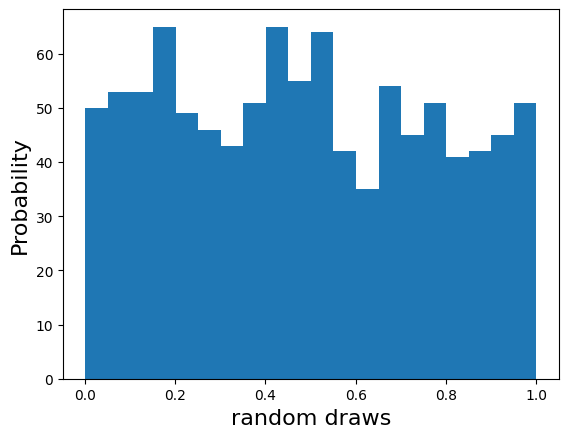

In [7]:
# Check that values are reasonably random by plotting a histogram

import matplotlib.pyplot as plt

plt.hist(xr, bins=20);
plt.xlabel('random draws', fontsize=16)
plt.ylabel('Probability', fontsize=16)

Text(0, 0.5, 'Neural Response (Spikes)')

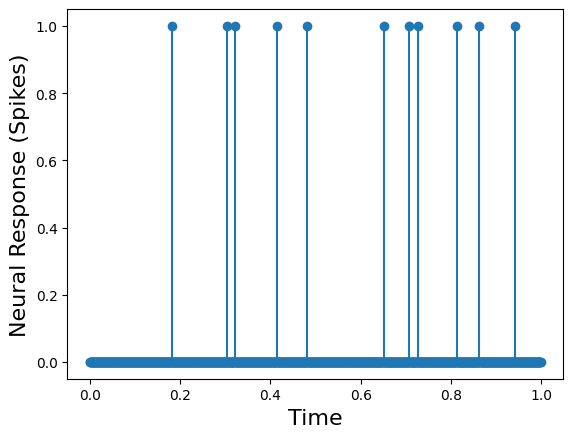

In [8]:
# Now, insert a spike whenever the probability of firing
# (rate*deltaT) is greater than the corresponding random number:
# Python (numpy) allows you to do this operation in one line, without a
# for loop.
# Remember, we defined: intervalRate = rate * deltaT

neuralResponse = intervalRate > xr

# We'll plot the neural responses (spikes) using the plt.stem()
# which is a lollipop plot...
plt.stem(times, neuralResponse, basefmt=" ");
plt.xlabel('Time', fontsize=16)
plt.ylabel('Neural Response (Spikes)', fontsize=16)

# You can repeat this several times, defining new random numbers xr

In [9]:
# To get a better understanding of what this does, we
# can look at the values for a vector of length 5
# Try changing the vector to get more spikes

tmpxr = np.array([.001, .1, .2, .5, .06])
print(intervalRate)
tmpResponse = intervalRate > tmpxr
print(tmpResponse)

0.01
[ True False False False False]


In [10]:
# Calculate the spike count, which are the number of spikes during the time duration

spikeCount = np.sum(neuralResponse)
print(spikeCount)

11


## Part 2

In [12]:
# TODO: Repeat 5000 times: generating random numbers xr, computing neuralResponse and calculating
# spikeCount. Save the resulting number of spikes into spikeCounts each of the 5000 times.

length = 5000
spikeCounts = np.zeros(length)
print(spikeCounts.shape)

for repeat in range(length):
  xr = np.random.rand(*times.shape)
  neuralResponse = intervalRate > xr
  spikeCounts[repeat] = np.sum(neuralResponse)

(5000,)


In [13]:
# What is the mean of the spikeCounts? How does it
# compare to the firing rate?

print(np.mean(spikeCounts))
print(rate)

10.009
10


1.0
24.0


Text(0, 0.5, 'Probability')

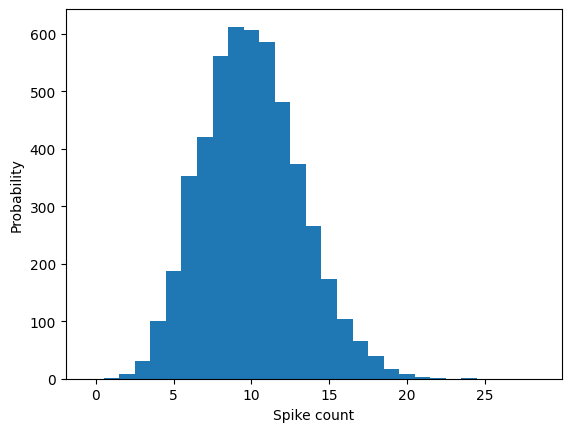

In [14]:
# Plot a spike count histogram

print(np.min(spikeCounts))
print(np.max(spikeCounts))
x=np.arange(0, 30);
plt.hist(spikeCounts, bins=x, align='left')
plt.xlabel('Spike count')
plt.ylabel('Probability')

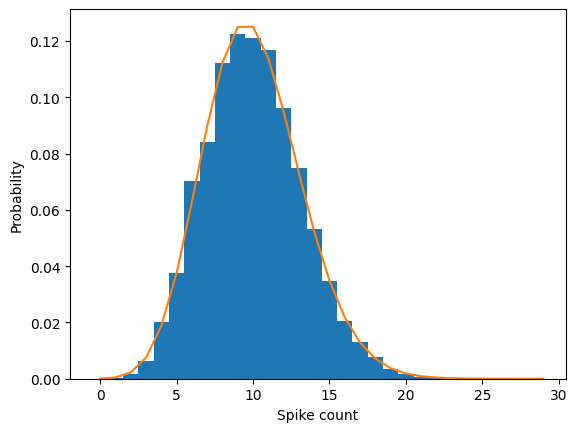

In [15]:
# Plot a normalized histogram (that sums to 1)
# for comparison with the Poisson

from scipy.stats import poisson

plt.hist(spikeCounts, bins=x, density=True, align='left')
plt.xlabel('Spike count')
plt.ylabel('Probability')
y = poisson.pmf(x, mu=np.mean(spikeCounts))
plt.plot(x,y)

# To Do

In [ ]:
#   Here are some things for you to do in class for the code above:

# - Try repeating the above code by choosing a lower firing rate
#   (3) or a higher rate (15) by changing the variable rate at the top.
#   Plot the resulting distributions. How does the mean change?
#   Also plot examples of the spike trains in the repeated runs.

# - Try changing the number of repeats from 1000, to 50, 10, and 10000.
#   Plot the resulting distributions. How good is the fit to Poisson?



In [23]:
def variable_rate_spike_train(rate=10):
    deltaT = 1e-3
    duration = 1
    intervalRate = rate * deltaT

    repeats = [10, 50, 5000, 10000]

    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    axes = axes.flatten()

    for i in range(len(repeats)):
        spikeCounts = np.zeros(repeats[i])

        for j in range(repeats[i]):
            xr = np.random.rand(int(duration / deltaT))
            neuralResponse = intervalRate > xr
            spikeCounts[j] = np.sum(neuralResponse)

        print(f"For rate={rate}, Repeats={repeats[i]:05} -> Min: {np.min(spikeCounts):.2f}, Max: {np.max(spikeCounts):.2f}, Mean: {np.mean(spikeCounts):.2f}")

        x = np.arange(0, max(spikeCounts) + 1)
        y = poisson.pmf(x, mu=np.mean(spikeCounts))

        axes[i].hist(spikeCounts, bins=x, density=True, align='left', alpha=0.7, color='b', edgecolor='black')
        axes[i].plot(x, y, 'r-', label="Poisson Fit")
        axes[i].set_title(f"Rate: {rate}, Repeats: {repeats[i]}")
        axes[i].set_xlabel('Spike Count')
        axes[i].set_ylabel('Probability')
        axes[i].legend()

    plt.tight_layout()
    plt.show()


For rate=10, Repeats=00010 -> Min: 7.00, Max: 16.00, Mean: 10.50
For rate=10, Repeats=00050 -> Min: 3.00, Max: 16.00, Mean: 9.76
For rate=10, Repeats=05000 -> Min: 1.00, Max: 24.00, Mean: 10.06
For rate=10, Repeats=10000 -> Min: 1.00, Max: 26.00, Mean: 9.98


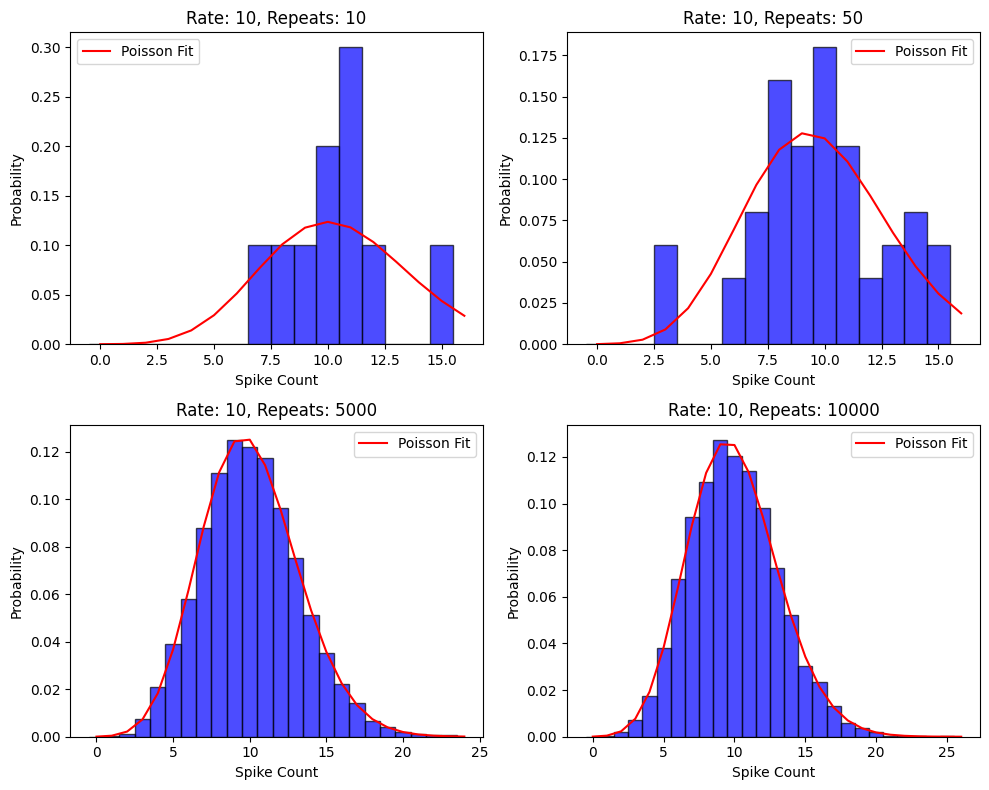

In [24]:
variable_rate_spike_train(10)

For rate=30, Repeats=00010 -> Min: 24.00, Max: 38.00, Mean: 31.00
For rate=30, Repeats=00050 -> Min: 18.00, Max: 41.00, Mean: 28.78
For rate=30, Repeats=05000 -> Min: 9.00, Max: 52.00, Mean: 29.91
For rate=30, Repeats=10000 -> Min: 13.00, Max: 52.00, Mean: 29.96


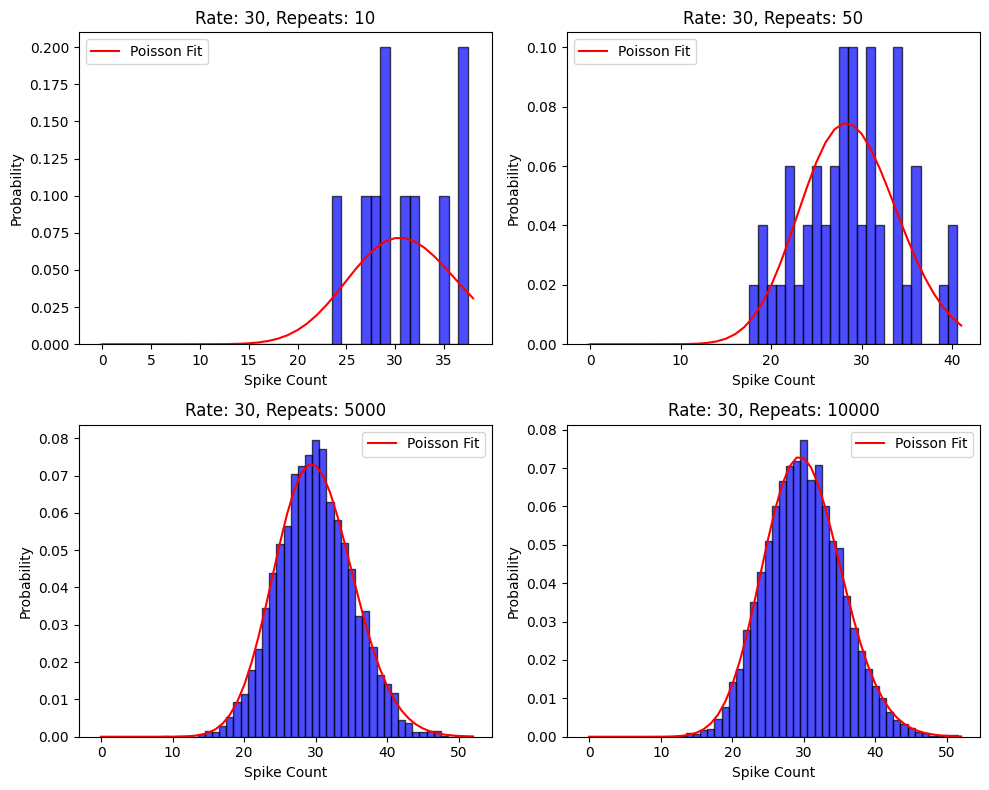

In [25]:
variable_rate_spike_train(30)

### Observations:
From the results, we can get three key insights:
- Higher rates (30) result in broader, higher mean distributions; lower rates (10) yield narrower distributions.
- Increasing repeats (from 10 to 10,000) improves the fit to the Poisson distribution, reducing variability.
- Small samples show noisy, inconsistent histograms; large samples produce smoother, symmetric distributions matching Poisson expectations.

In [26]:
# - In the tutorial, we assume Poisson spiking of neurons. In what ways
#   is this different from biological neurons? Hint: You can look at the
#   poisson.pdf reference posted on the class website.

The main difference between Poisson spiking neurons and biological neurons lies in their firing patterns.
- Poisson spiking assumes that spikes occur at random intervals with a fixed probability over time, resulting in an exponential distribution of interspike intervals.
- On the other hand, biological neurons display more organized spiking behavior influenced by factors like refractoriness, synaptic interactions, and internal dynamics, leading to non-exponential, more complex interspike interval distributions.